# Einführung in Python für die Computational Social Science (CSS)

## Jonas Volle
Wissenschaftlicher Mitarbeiter  
Chair of Methodology and Empirical Social Research  
Otto-von-Guericke-Universität

[jonas.volle@ovgu.de](mailto:jonas.volle@ovgu.de)

**Sprechstunde**: individuell nach vorheriger Anmeldung per [Mail](mailto:jonas.volle@ovgu.de)

Donnerstag, 20.06.2024

**Quelle:** Ich orientiere mich für diese Sitzung teils an den Kapiteln 4 und 5 aus dem Buch:  

McLevey, John. 2021. Doing Computational Social Science: A Practical Introduction. 1st ed. Thousand Oaks: SAGE Publications.

# Session 5: APIs

## Inhalt

- Besprechung der Übung 2 von letzter Woche
- API

## Application Programming Interfaces

### Was ist ein API?

- **I**nterface (Benutzeroberfläche): Interaktion zwischen Mensch und Computer, um bestimmte Aufgaben zu erledigen, ohne dass er verstehen muss, wie diese Aufgabe tatsächlich ausgeführt wird.  
- Wie Benutzeroberflächen machen APIs schwierige Dinge einfacher, indem sie eine Menge von Prozessen auf niedriger Ebene abstrahieren. APIs bündeln Funktionen damit diese besonders leicht zu verstehen und zu verwenden sind.

### RESTful APIs
- Besondere Art von APIs, die auf dem REST (Representational State Transfer) Prinzip basieren.
- RESTful APIs ermöglichen die Kommunikation und den Datenaustausch zwischen verschiedenen Anwendungen über das Internet.
- RESTful APIs arbeiten nach dem Client-Server-Modell, wobei der Client Anfragen (Requests) an den Server sendet und der Server entsprechend antwortet.
- Die Daten werden normalerweise im JSON- oder XML-Format übertragen.
- RESTful APIs sind zustandslos, was bedeutet, dass jede Anfrage unabhängig ist und der Server keine Informationen über vergangene Anfragen speichert.
- Zugriff über Endpunkte (Endpoints)

### Requests mit Python
- Requests werden an einen bestimmten Endpunkt (Endpoint) gesendet in Form einer URL (APIs können verschiedene Enpoints haben!)
- Diese URL besteht aus verschiedenen Teilen, die wir so spezifizieren können (Suchbegriffe, Filter, Parameter etc.), sodass wir den gewünschten Inhalt zurück bekommen.
- Die meisten APIs haben *rate limits*, also Obergrenzen für Anfragen in einer bestimmten Zeitspanne. 

### API keys oder tokens
- Um Anfragen an einen API zu senden, benötigen wir in den meisten Fällen einen API key oder API token.
- API keys oder tokens funktionieren wie Benutzername und Passwort die uns identifizieren.
- Diese keys können auf der jeweiligen Webseite des APIs beantragt werden und werden uns dann zugewiesen.
- Es ist wichtig, dass wir diese Zugangsdaten nicht teilen, das heißt auch nicht direkt in unser Script schreiben.

### Responses
- Wenn wir eine GET-Anfrage an den API senden, bekommen wir im Gegenzug eine Antwort (response)
- In den meisten Fällen bekommen wir die Daten im `json`-Format zurück. Das steht für *JavaScript Object Notation*.
- `json` ist eine genestete Datenstruktur, die aussieht wie ein *dictionary* in Python und in der die Daten in *key-value* Paaren gespeichert sind.
- Mit dem Python Paket `json` können wir diese Datenstrukturen wie ein `dictionary` behandeln.
- Mit `pandas` Methode `.read_json()` können wir dieses Datenformat auch direkt in einen Dataframe umwandeln.

## The Guardian API

Die Zeitung 'The Guardian' bietet fünf verschiedene Endpunkte:

1. Der content-Endpoint liefert den Text und die Metadaten für veröffentlichte Artikel. Es ist möglich, die Ergebnisse mittels Suchanfragen abzufragen und zu filtern. Dieser Endpunkt ist wahrscheinlich der nützlichste für Forscher:innen. 
2. Der tags-Endpunkt liefert API-Tags für mehr als 50.000 Ergebnisse, die in anderen API-Abfragen verwendet werden können. 
3. Der sections-Emdpunkt liefert Informationen über die Gruppierung veröffentlichter Artikel in Sektionen. 
4. Der editions-Endpunkt liefert Inhalte für jede der regionalen Hauptseiten: USA UK, Australien und International. 
5. Der single-Endpunkt Punkt liefert Daten für einzelne Elemente, einschließlich Inhalt, Tags und Abschnitte.

In vielen Fällen gibt es in Python schon Clients für einschlägige APIs. Diese Clients sind Pakete und beinhalten eine Reihe an Funktionen, die die Arbeit mit dem API erleichtert. In diesem Fall arbeiten wir aber mit dem `requests` Paket direkt mit dem API um die Logik hinter den API-Anfragen und Antworten zu verstehen.

### Zugriff auf den Guardian API

Zunächst müssen wir uns für einen API-key registrieren. Das geht hier: https://bonobo.capi.gutools.co.uk/register/developer

Nach der erfolgreichen Registrierung bekommen wir einen key zugesendet, den wir speichern müssen. Dafür erstellen wir eine Datei mit dem Namen `cred.py` im gleichen Ordner wie dieses Notebook. In dieser Datei weisen wir der Variable `GUARDIAN_KEY` den zugesendeten Key zu. Wenn wir git zur Versionskontrolle nutzen, können wir diese Datei der `.gitignore` Liste hinzufügen. Dann wird unser Key nicht synchronisiert.

In [1]:
GUARDIAN_KEY = 'paste_your_key_here'

Diese Datei können wir dann in unser Script importieren:

In [2]:
import cred 
GUARDIAN_KEY = cred.GUARDIAN_KEY

In [3]:
# print(GUARDIAN_KEY)

Wir verwenden ein Paket namens `requests`, um unsere API-Anfragen zu stellen. Sobald das Paket importiert wurde, können wir dies tun, indem wir die Methode `.get()` mit der Basis-API-URL für den Inhaltsendpunkt versehen. Außerdem erstellen wir ein Wörterbuch namens `PARAMS`, das ein Key-Values-Paar für unseren API-Schlüssel enthält. Später werden wir diesem Wörterbuch weitere Key-Values-Paare hinzufügen, um zu ändern, was die API zurückgibt.

In [4]:
import requests
import pprint as pp

In [5]:
# API Endpoint
API_ENDPOINT = 'http://content.guardianapis.com/search' 

# API Parameter
PARAMS = {'api-key': GUARDIAN_KEY} 

In [6]:
# GET request
response = requests.get(API_ENDPOINT, params=PARAMS) 

# json Datei als dictionary speichern
response_dict = response.json()['response'] 

In [7]:
# Unsere Anfrage besteht aus dieser URL:
response.url

'http://content.guardianapis.com/search?api-key=ca445d55-8ebd-48f6-8a32-9d3a0a35e21b'

In [8]:
pp.pprint(response_dict)

{'currentPage': 1,
 'orderBy': 'newest',
 'pageSize': 10,
 'pages': 250851,
 'results': [{'apiUrl': 'https://content.guardianapis.com/sport/live/2024/jun/20/royal-ascot-day-three-gold-cup-horse-racing-news-latest-tips-live',
              'id': 'sport/live/2024/jun/20/royal-ascot-day-three-gold-cup-horse-racing-news-latest-tips-live',
              'isHosted': False,
              'pillarId': 'pillar/sport',
              'pillarName': 'Sport',
              'sectionId': 'sport',
              'sectionName': 'Sport',
              'type': 'liveblog',
              'webPublicationDate': '2024-06-20T10:17:59Z',
              'webTitle': 'Royal Ascot day three: Gold Cup, latest news and '
                          'racing tips – live',
              'webUrl': 'https://www.theguardian.com/sport/live/2024/jun/20/royal-ascot-day-three-gold-cup-horse-racing-news-latest-tips-live'},
             {'apiUrl': 'https://content.guardianapis.com/politics/live/2024/jun/20/uk-general-election-2024-liv

In [9]:
# Was sind die keys des dictionaries?
print(response_dict.keys())

dict_keys(['status', 'userTier', 'total', 'startIndex', 'pageSize', 'currentPage', 'pages', 'orderBy', 'results'])


Die Ergebnisse sind dem key `'results'` zugewiesen. Results besteht aus einem dictionary je Eintrag. Diese dictonaries befinden sich in einer Liste.

In [10]:
pp.pprint(response_dict['results'])

[{'apiUrl': 'https://content.guardianapis.com/sport/live/2024/jun/20/royal-ascot-day-three-gold-cup-horse-racing-news-latest-tips-live',
  'id': 'sport/live/2024/jun/20/royal-ascot-day-three-gold-cup-horse-racing-news-latest-tips-live',
  'isHosted': False,
  'pillarId': 'pillar/sport',
  'pillarName': 'Sport',
  'sectionId': 'sport',
  'sectionName': 'Sport',
  'type': 'liveblog',
  'webPublicationDate': '2024-06-20T10:17:59Z',
  'webTitle': 'Royal Ascot day three: Gold Cup, latest news and racing tips – '
              'live',
  'webUrl': 'https://www.theguardian.com/sport/live/2024/jun/20/royal-ascot-day-three-gold-cup-horse-racing-news-latest-tips-live'},
 {'apiUrl': 'https://content.guardianapis.com/politics/live/2024/jun/20/uk-general-election-2024-live-updates-labour-tories-polls-seats-inflation',
  'id': 'politics/live/2024/jun/20/uk-general-election-2024-live-updates-labour-tories-polls-seats-inflation',
  'isHosted': False,
  'pillarId': 'pillar/news',
  'pillarName': 'News',

In [11]:
response_dict['results'][0]

{'id': 'sport/live/2024/jun/20/royal-ascot-day-three-gold-cup-horse-racing-news-latest-tips-live',
 'type': 'liveblog',
 'sectionId': 'sport',
 'sectionName': 'Sport',
 'webPublicationDate': '2024-06-20T10:17:59Z',
 'webTitle': 'Royal Ascot day three: Gold Cup, latest news and racing tips – live',
 'webUrl': 'https://www.theguardian.com/sport/live/2024/jun/20/royal-ascot-day-three-gold-cup-horse-racing-news-latest-tips-live',
 'apiUrl': 'https://content.guardianapis.com/sport/live/2024/jun/20/royal-ascot-day-three-gold-cup-horse-racing-news-latest-tips-live',
 'isHosted': False,
 'pillarId': 'pillar/sport',
 'pillarName': 'Sport'}

In [12]:
response_dict['results'][0]['webTitle']

'Royal Ascot day three: Gold Cup, latest news and racing tips – live'

### Ergebnisse filtern
Wir können unserer API Anfrage noch weitere Parameter hinzufügen. Diese Parameter können wir der Dokumentation entnehmen: https://open-platform.theguardian.com/documentation/search

In [13]:
PARAMS = { 
    'api-key': GUARDIAN_KEY,
    'from-date': '2024-06-14',
    'to-date': '2024-06-19',
    'lang': 'en',
    'production-office': 'uk',
    'q': 'germany' 
}

In [14]:
response = requests.get(API_ENDPOINT, params=PARAMS)
response_dict = response.json()['response']

Unsere Anfrage besteht aus dieser URL. Die Antwort können wir uns auch im Browser anschauen. Hierbei bietet sich eine json Erweiterung an, die das Ergebnis schön formatiert. Für Chrome z.B. JSONVue (https://chrome.google.com/webstore/detail/jsonvue/chklaanhfefbnpoihckbnefhakgolnmc)

In [15]:
# Unsere Anfrage besteht aus dieser URL.
response.url

'http://content.guardianapis.com/search?api-key=ca445d55-8ebd-48f6-8a32-9d3a0a35e21b&from-date=2024-06-14&to-date=2024-06-19&lang=en&production-office=uk&q=germany'

Damit wir auch die Texte der Artikel mit ausgegeben bekommen, müssen wir unsere Parameter ändern und Felder hinzufügen:

In [16]:
PARAMS = {
    'api-key': GUARDIAN_KEY,
    'from-date': '2024-06-14',
    'to-date': '2024-06-19',
    'lang': 'en',
    'production-office': 'uk',
    'q': 'germany',
    'show-fields': 'wordcount,body,byline' 
} 

In [17]:
response = requests.get(API_ENDPOINT, params=PARAMS) 
response_dict = response.json()['response']

In [18]:
# response.url

In [19]:
response_dict['results']

[{'id': 'football/article/2024/jun/14/germany-team-must-turn-nation-from-doubters-into-believers',
  'type': 'article',
  'sectionId': 'football',
  'sectionName': 'Football',
  'webPublicationDate': '2024-06-14T07:00:44Z',
  'webTitle': 'Germany team must turn nation from doubters into believers | Jonathan Liew',
  'webUrl': 'https://www.theguardian.com/football/article/2024/jun/14/germany-team-must-turn-nation-from-doubters-into-believers',
  'apiUrl': 'https://content.guardianapis.com/football/article/2024/jun/14/germany-team-must-turn-nation-from-doubters-into-believers',
  'fields': {'byline': 'Jonathan Liew in Berlin',
   'body': '<p>If only the Germans had a word for “zeitgeist”. There’s a football tournament starting here on Friday, not that you would necessarily know it. Indeed, from a cursory trawl of Thursday’s media what was most striking of all was the absence of Euros-buzz, the suspicion that there are bigger priorities out there. “CANCER,” screamed the front page of <em>

In [20]:
for response in response_dict['results']:
    print(response['fields'])

{'byline': 'Jonathan Liew in Berlin', 'body': '<p>If only the Germans had a word for “zeitgeist”. There’s a football tournament starting here on Friday, not that you would necessarily know it. Indeed, from a cursory trawl of Thursday’s media what was most striking of all was the absence of Euros-buzz, the suspicion that there are bigger priorities out there. “CANCER,” screamed the front page of <em>Bild</em>, just in case you were thinking of getting too excited. Chancellor Olaf Scholz is missing the opening game to attend the G7 in Italy. The sports bulletins were dominated by the sudden resignation of the Borussia Dortmund coach, Edin Terzic. On the Kicker website, the first Euro 2024 news appeared some way below a story about RB Leipzig’s summer transfer business.</p> <p>None of which should necessarily be mistaken for pure apathy. Rather, there is a more complex melange of emotions at work here. Euro 2024 is still very much present, as long as you know where to look: the big town s

In [21]:
for i in response_dict['results']:
    print(i['fields']['body'])

<p>If only the Germans had a word for “zeitgeist”. There’s a football tournament starting here on Friday, not that you would necessarily know it. Indeed, from a cursory trawl of Thursday’s media what was most striking of all was the absence of Euros-buzz, the suspicion that there are bigger priorities out there. “CANCER,” screamed the front page of <em>Bild</em>, just in case you were thinking of getting too excited. Chancellor Olaf Scholz is missing the opening game to attend the G7 in Italy. The sports bulletins were dominated by the sudden resignation of the Borussia Dortmund coach, Edin Terzic. On the Kicker website, the first Euro 2024 news appeared some way below a story about RB Leipzig’s summer transfer business.</p> <p>None of which should necessarily be mistaken for pure apathy. Rather, there is a more complex melange of emotions at work here. Euro 2024 is still very much present, as long as you know where to look: the big town squares where overseas fans have begun to congre

### Größere Anfragen senden

Bis jetzt haben wir nur Daten für 10 Artikel erhalten. Wenn wir mehr Artikel bekommen wollen, müssen wir ein weiteres Konzept von APIs verstehen:  
Jede Antwort enhält neben den results auch Metadaten:
- `response_dict['total']` --> Anzahl der Artikel
- `response_dict['pages']` --> Anzahl der Seiten
- `response_dict['pageSize']` --> Anzahl der Artikel je Seite
- `response_dict['currentPage']` --> Aktuelle Seite

APIs funktionieren wie Suchmaschinen, sie geben die Ergebnisse auf verschiedenen Seiten zurück. Wir können die oben genannten Parameter mit in unsere API-Anfrage aufnehmen, um etwa auf eine bestimmte Seite zu navigieren, oder die Größe der jeweiligen Seiten zu bestimmen. Wenn wir alle Ergebnisse haben möchten, müssen wir mit einem Loop über alle Seiten loopen.

In [22]:
response_dict.keys()

dict_keys(['status', 'userTier', 'total', 'startIndex', 'pageSize', 'currentPage', 'pages', 'orderBy', 'results'])

In [23]:
response_dict['total']

146

In [24]:
response_dict['pages']

15

In [25]:
response_dict['pageSize']

10

In [26]:
response_dict['currentPage']

1

Wir vergrößern die Anzahl der Artikel je Seite, indem wir den Parameter `page-size` erhöhen:

In [27]:
PARAMS = {
    'api-key': GUARDIAN_KEY,
    'from-date': '2024-06-14',
    'to-date': '2024-06-19',
    'lang': 'en',
    'production-office': 'uk',
    'q': 'germany',
    'show-fields': 'wordcount,body,byline',
    'page-size': 50, # 50 Artikel je Seite
} 

response = requests.get(API_ENDPOINT, params=PARAMS) 
response_dict = response.json()['response']

Mit einem `while`-Loop können wir uns jede Seite des Ergbisses anzeigen lassen. Die Ergebnisse jeder Seite speichern wir in der List `all_results`. Damit wir nicht über die `rate-limits` des APIs kommen, können wir `time.sleep()` benutzen um, in jeder Runde ein bisschen zu warten.

In [28]:
import time

In [29]:
all_results = [] 
cur_page = 1 
total_pages = 1

while (cur_page <= total_pages) and (cur_page < 10): # with a fail safe 
    
    # Make a API request 
    PARAMS['page'] = cur_page 
    response = requests.get(API_ENDPOINT, params=PARAMS) 
    response_dict = response.json()['response'] 

    # Update total_pages
    total_pages = response_dict['pages'] 
    
    print(f"page: {cur_page} of {total_pages} - Articles (total): {response_dict['total']}")
    
    # Update our master results list 
    all_results += (response_dict['results']) 
    
    # Update cur_page 
    cur_page += 1 
    
    # sleep for 1 second
    time.sleep(1)
    
len(all_results)

page: 1 of 3 - Articles (total): 146
page: 2 of 3 - Articles (total): 146
page: 3 of 3 - Articles (total): 146


146

In [30]:
all_results[0]

{'id': 'football/article/2024/jun/14/germany-team-must-turn-nation-from-doubters-into-believers',
 'type': 'article',
 'sectionId': 'football',
 'sectionName': 'Football',
 'webPublicationDate': '2024-06-14T07:00:44Z',
 'webTitle': 'Germany team must turn nation from doubters into believers | Jonathan Liew',
 'webUrl': 'https://www.theguardian.com/football/article/2024/jun/14/germany-team-must-turn-nation-from-doubters-into-believers',
 'apiUrl': 'https://content.guardianapis.com/football/article/2024/jun/14/germany-team-must-turn-nation-from-doubters-into-believers',
 'fields': {'byline': 'Jonathan Liew in Berlin',
  'body': '<p>If only the Germans had a word for “zeitgeist”. There’s a football tournament starting here on Friday, not that you would necessarily know it. Indeed, from a cursory trawl of Thursday’s media what was most striking of all was the absence of Euros-buzz, the suspicion that there are bigger priorities out there. “CANCER,” screamed the front page of <em>Bild</em>,

### Ergebnisse speichern

Nun sollten wir unsere Daten auf unserer Festplatte speichern, um später auf sie zurückgreifen zu können, ohne den API überflüssig benutzen zu müssen. Es bietet sich auch an den Code für die Datenerhebung und Analyse zu trennen.  

Wir können unsere Daten mit dem `json` Modul auf unsere Festplatte schreiben:

In [31]:
import json

In [32]:
import json

FILE_PATH = '../data/guardian_api_results.json'

with open(FILE_PATH, 'w') as outfile:
    json.dump(all_results, outfile)

So können wir die Daten dann wieder lesen:

In [33]:
FILE_PATH = '../data/guardian_api_results.json'

with open(FILE_PATH) as f:
    guardian_results = json.load(f)

In [34]:
guardian_results[0:5]

[{'id': 'football/article/2024/jun/14/germany-team-must-turn-nation-from-doubters-into-believers',
  'type': 'article',
  'sectionId': 'football',
  'sectionName': 'Football',
  'webPublicationDate': '2024-06-14T07:00:44Z',
  'webTitle': 'Germany team must turn nation from doubters into believers | Jonathan Liew',
  'webUrl': 'https://www.theguardian.com/football/article/2024/jun/14/germany-team-must-turn-nation-from-doubters-into-believers',
  'apiUrl': 'https://content.guardianapis.com/football/article/2024/jun/14/germany-team-must-turn-nation-from-doubters-into-believers',
  'fields': {'byline': 'Jonathan Liew in Berlin',
   'body': '<p>If only the Germans had a word for “zeitgeist”. There’s a football tournament starting here on Friday, not that you would necessarily know it. Indeed, from a cursory trawl of Thursday’s media what was most striking of all was the absence of Euros-buzz, the suspicion that there are bigger priorities out there. “CANCER,” screamed the front page of <em>

### Ergebnisse in einem DataFrame speichern:

In [35]:
import pandas as pd

In [36]:
all_results_df = pd.json_normalize(all_results)
all_results_df.head()

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName,fields.byline,fields.body,fields.wordcount
0,football/article/2024/jun/14/germany-team-must...,article,football,Football,2024-06-14T07:00:44Z,Germany team must turn nation from doubters in...,https://www.theguardian.com/football/article/2...,https://content.guardianapis.com/football/arti...,False,pillar/sport,Sport,Jonathan Liew in Berlin,<p>If only the Germans had a word for “zeitgei...,978
1,football/live/2024/jun/19/germany-v-hungary-eu...,liveblog,football,Football,2024-06-19T18:22:59Z,Germany 2-0 Hungary: Euro 2024 – as it happened,https://www.theguardian.com/football/live/2024...,https://content.guardianapis.com/football/live...,False,pillar/sport,Sport,Barry Glendenning,"<div id=""block-667321be8f08868c78b14ec6"" class...",2823
2,football/article/2024/jun/17/turkey-euro-2024-...,article,football,Football,2024-06-17T21:39:06Z,Turkey enjoy rapturous Euro 2024 reception fro...,https://www.theguardian.com/football/article/2...,https://content.guardianapis.com/football/arti...,False,pillar/sport,Sport,Kate Connolly in Berlin,"<p>For Karani, Euro 2024 in Germany has the di...",1152
3,football/article/2024/jun/14/germany-5-1-scotl...,article,football,Football,2024-06-14T21:54:34Z,Germany 5-1 Scotland: player ratings from the ...,https://www.theguardian.com/football/article/2...,https://content.guardianapis.com/football/arti...,False,pillar/sport,Sport,Nick Ames at the Munich Football Arena,<h2><strong>Germany (4-2-3-1)</strong></h2> <p...,528
4,football/live/2024/jun/14/germany-v-scotland-e...,liveblog,football,Football,2024-06-14T21:31:05Z,Germany 5-1 Scotland: Euro 2024 opening game –...,https://www.theguardian.com/football/live/2024...,https://content.guardianapis.com/football/live...,False,pillar/sport,Sport,Niall McVeigh,"<div id=""block-666ccafc8f08cd19f68f7598"" class...",4225


In [37]:
all_results_df['fields.body'][0]

'<p>If only the Germans had a word for “zeitgeist”. There’s a football tournament starting here on Friday, not that you would necessarily know it. Indeed, from a cursory trawl of Thursday’s media what was most striking of all was the absence of Euros-buzz, the suspicion that there are bigger priorities out there. “CANCER,” screamed the front page of <em>Bild</em>, just in case you were thinking of getting too excited. Chancellor Olaf Scholz is missing the opening game to attend the G7 in Italy. The sports bulletins were dominated by the sudden resignation of the Borussia Dortmund coach, Edin Terzic. On the Kicker website, the first Euro 2024 news appeared some way below a story about RB Leipzig’s summer transfer business.</p> <p>None of which should necessarily be mistaken for pure apathy. Rather, there is a more complex melange of emotions at work here. Euro 2024 is still very much present, as long as you know where to look: the big town squares where overseas fans have begun to congr

### Dataframe aufräumen

Mit dem Paket `BeautifulSoup` können wir aus dem html-body den reinen Text extrahieren.

In [38]:
from bs4 import BeautifulSoup

In [39]:
all_results_df['text'] = [BeautifulSoup(i, "html.parser").text for i in all_results_df['fields.body']]

In [40]:
all_results_df[['webTitle','fields.body', 'text']].head()

,webTitle,fields.body,text
0,Germany team must turn nation from doubters in...,<p>If only the Germans had a word for “zeitgei...,If only the Germans had a word for “zeitgeist”...
1,Germany 2-0 Hungary: Euro 2024 – as it happened,"<div id=""block-667321be8f08868c78b14ec6"" class...",\n 7.22pm BST \nMatch report: Germany 2-0 Hung...
2,Turkey enjoy rapturous Euro 2024 reception fro...,"<p>For Karani, Euro 2024 in Germany has the di...","For Karani, Euro 2024 in Germany has the disti..."
3,Germany 5-1 Scotland: player ratings from the ...,<h2><strong>Germany (4-2-3-1)</strong></h2> <p...,Germany (4-2-3-1) Manuel Neuer Has the veteran...
4,Germany 5-1 Scotland: Euro 2024 opening game –...,"<div id=""block-666ccafc8f08cd19f68f7598"" class...",11.58pm BST More reaction and analysis R...


In [41]:
all_results_df['text'][0]

'If only the Germans had a word for “zeitgeist”. There’s a football tournament starting here on Friday, not that you would necessarily know it. Indeed, from a cursory trawl of Thursday’s media what was most striking of all was the absence of Euros-buzz, the suspicion that there are bigger priorities out there. “CANCER,” screamed the front page of Bild, just in case you were thinking of getting too excited. Chancellor Olaf Scholz is missing the opening game to attend the G7 in Italy. The sports bulletins were dominated by the sudden resignation of the Borussia Dortmund coach, Edin Terzic. On the Kicker website, the first Euro 2024 news appeared some way below a story about RB Leipzig’s summer transfer business. None of which should necessarily be mistaken for pure apathy. Rather, there is a more complex melange of emotions at work here. Euro 2024 is still very much present, as long as you know where to look: the big town squares where overseas fans have begun to congregate, the televisi

Die Date Variabel können wir in eine Pandas Datumsvariable verwandeln.

In [42]:
all_results_df['article_date'] = pd.to_datetime(all_results_df.webPublicationDate)

In [43]:
all_results_df[['id', 'article_date', 'sectionName', 'webTitle', 'webUrl', 'fields.byline', 'text']].head()

,id,article_date,sectionName,webTitle,webUrl,fields.byline,text
0,football/article/2024/jun/14/germany-team-must...,2024-06-14 07:00:44+00:00,Football,Germany team must turn nation from doubters in...,https://www.theguardian.com/football/article/2...,Jonathan Liew in Berlin,If only the Germans had a word for “zeitgeist”...
1,football/live/2024/jun/19/germany-v-hungary-eu...,2024-06-19 18:22:59+00:00,Football,Germany 2-0 Hungary: Euro 2024 – as it happened,https://www.theguardian.com/football/live/2024...,Barry Glendenning,\n 7.22pm BST \nMatch report: Germany 2-0 Hung...
2,football/article/2024/jun/17/turkey-euro-2024-...,2024-06-17 21:39:06+00:00,Football,Turkey enjoy rapturous Euro 2024 reception fro...,https://www.theguardian.com/football/article/2...,Kate Connolly in Berlin,"For Karani, Euro 2024 in Germany has the disti..."
3,football/article/2024/jun/14/germany-5-1-scotl...,2024-06-14 21:54:34+00:00,Football,Germany 5-1 Scotland: player ratings from the ...,https://www.theguardian.com/football/article/2...,Nick Ames at the Munich Football Arena,Germany (4-2-3-1) Manuel Neuer Has the veteran...
4,football/live/2024/jun/14/germany-v-scotland-e...,2024-06-14 21:31:05+00:00,Football,Germany 5-1 Scotland: Euro 2024 opening game –...,https://www.theguardian.com/football/live/2024...,Niall McVeigh,11.58pm BST More reaction and analysis R...


Wir können Spalten umbenennen:

In [44]:
# rename columns
all_results_df = all_results_df.rename(columns={'webTitle':'article_title',
                                                'webUrl':'article_url',
                                                'fields.byline':'article_author',
                                               'sectionName':'section_name',
                                               'pillarName':'pillar_name'})

... und Spalten auswählen.

In [45]:
all_results_df_f = all_results_df[['id', 'article_date', 'section_name', 'pillar_name',
                                   'article_title', 'article_url', 
                                   'article_author', 'text']].copy()

In [46]:
all_results_df_f.head()

,id,article_date,section_name,pillar_name,article_title,article_url,article_author,text
0,football/article/2024/jun/14/germany-team-must...,2024-06-14 07:00:44+00:00,Football,Sport,Germany team must turn nation from doubters in...,https://www.theguardian.com/football/article/2...,Jonathan Liew in Berlin,If only the Germans had a word for “zeitgeist”...
1,football/live/2024/jun/19/germany-v-hungary-eu...,2024-06-19 18:22:59+00:00,Football,Sport,Germany 2-0 Hungary: Euro 2024 – as it happened,https://www.theguardian.com/football/live/2024...,Barry Glendenning,\n 7.22pm BST \nMatch report: Germany 2-0 Hung...
2,football/article/2024/jun/17/turkey-euro-2024-...,2024-06-17 21:39:06+00:00,Football,Sport,Turkey enjoy rapturous Euro 2024 reception fro...,https://www.theguardian.com/football/article/2...,Kate Connolly in Berlin,"For Karani, Euro 2024 in Germany has the disti..."
3,football/article/2024/jun/14/germany-5-1-scotl...,2024-06-14 21:54:34+00:00,Football,Sport,Germany 5-1 Scotland: player ratings from the ...,https://www.theguardian.com/football/article/2...,Nick Ames at the Munich Football Arena,Germany (4-2-3-1) Manuel Neuer Has the veteran...
4,football/live/2024/jun/14/germany-v-scotland-e...,2024-06-14 21:31:05+00:00,Football,Sport,Germany 5-1 Scotland: Euro 2024 opening game –...,https://www.theguardian.com/football/live/2024...,Niall McVeigh,11.58pm BST More reaction and analysis R...


### Arbeiten mit Zeireihendaten

In [47]:
all_results_df_f[['article_title', 'article_author', 'article_date']].head()

,article_title,article_author,article_date
0,Germany team must turn nation from doubters in...,Jonathan Liew in Berlin,2024-06-14 07:00:44+00:00
1,Germany 2-0 Hungary: Euro 2024 – as it happened,Barry Glendenning,2024-06-19 18:22:59+00:00
2,Turkey enjoy rapturous Euro 2024 reception fro...,Kate Connolly in Berlin,2024-06-17 21:39:06+00:00
3,Germany 5-1 Scotland: player ratings from the ...,Nick Ames at the Munich Football Arena,2024-06-14 21:54:34+00:00
4,Germany 5-1 Scotland: Euro 2024 opening game –...,Niall McVeigh,2024-06-14 21:31:05+00:00


Die Felder des Datetime-Objekts lauten der Reihe nach wie folgt: Jahr-Monat-Tag Stunde:Minute: Sekunde:Mikrosekunde. Zum Abrufen einer ganzen Zahl, die dem Monat entspricht, in dem der Artikel veröffentlicht wurde:

In [48]:
all_results_df_f['article_date'].dt.month

0      6
1      6
2      6
3      6
4      6
      ..
141    6
142    6
143    6
144    6
145    6
Name: article_date, Length: 146, dtype: int32

Erstellen wir neue Variablen für das Jahr, den Monat und den Tag, an dem die einzelnen Tweets erstellt wurden. Dazu können wir die Attribute "Jahr", "Monat" und "Tag" des datetime-Objekts verwenden:

In [49]:
all_results_df_f['Year'] = all_results_df_f['article_date'].dt.year 
all_results_df_f['Month'] = all_results_df_f['article_date'].dt.month 
all_results_df_f['Day'] = all_results_df_f['article_date'].dt.day

In [50]:
all_results_df_f[['article_date', 'Year', 'Month', 'Day']].head()

,article_date,Year,Month,Day
0,2024-06-14 07:00:44+00:00,2024,6,14
1,2024-06-19 18:22:59+00:00,2024,6,19
2,2024-06-17 21:39:06+00:00,2024,6,17
3,2024-06-14 21:54:34+00:00,2024,6,14
4,2024-06-14 21:31:05+00:00,2024,6,14


Wenn unsere Datums- und Zeitvariablen als datetime-Objekte gespeichert werden, können wir auf viele zeitspezifische Attribute mit der Punktnotation zugreifen. Die Pandas-Dokumentation enthält viele Beispiele für die Arten von zeitlichen Einheiten und andere Funktionen. Wir können unseren dataframe auch auf der Grundlage von publish_date sortieren, da Pandas weiß, dass es mit datetime-Objekten arbeitet:

In [51]:
all_results_df_f_sorted = all_results_df_f.sort_values(['article_date'])

In [52]:
all_results_df_f_sorted

,id,article_date,section_name,pillar_name,article_title,article_url,article_author,text,Year,Month,Day
52,world/article/2024/jun/14/young-germans-afd-eu...,2024-06-14 04:00:40+00:00,World news,News,‘Crime is out of hand’: how young people turne...,https://www.theguardian.com/world/article/2024...,Deborah Cole in Brandenburg an der Havel,"Paul Friedrich, 16, could not wait to cast his...",2024,6,14
80,tv-and-radio/article/2024/jun/14/tv-tonight-th...,2024-06-14 05:20:41+00:00,Television & radio,Arts,TV tonight: the Welsh village that spotted a UFO,https://www.theguardian.com/tv-and-radio/artic...,,"Paranormal: The Village That Saw Aliens 9pm, B...",2024,6,14
118,travel/article/2024/jun/14/readers-tips-favour...,2024-06-14 06:00:44+00:00,Travel,Lifestyle,‘We drifted downriver and camped where we like...,https://www.theguardian.com/travel/article/202...,Guardian readers,A sublime dip in northern Italy\nIn the hills ...,2024,6,14
0,football/article/2024/jun/14/germany-team-must...,2024-06-14 07:00:44+00:00,Football,Sport,Germany team must turn nation from doubters in...,https://www.theguardian.com/football/article/2...,Jonathan Liew in Berlin,If only the Germans had a word for “zeitgeist”...,2024,6,14
20,football/article/2024/jun/14/fear-of-missing-o...,2024-06-14 07:00:46+00:00,Football,Sport,‘It was the fear of missing out’: Scotland fan...,https://www.theguardian.com/football/article/2...,Ewan Murray in Munich,The alarm was raised at about 9am on Thursday....,2024,6,14
...,...,...,...,...,...,...,...,...,...,...,...
91,football/article/2024/jun/19/scotland-switzerl...,2024-06-19 21:02:41+00:00,Football,Sport,Scotland keep knockout hopes alive after battl...,https://www.theguardian.com/football/article/2...,Ewan Murray at Cologne Stadium,Scotland came into this game with the sole asp...,2024,6,19
7,football/article/2024/jun/19/hungarys-marco-ro...,2024-06-19 21:25:05+00:00,Football,Sport,Hungary’s Marco Rossi accuses referee of ‘doub...,https://www.theguardian.com/football/article/2...,Nick Ames at the Stuttgart Arena,"The Hungary manager, Marco Rossi, accused the ...",2024,6,19
78,football/live/2024/jun/19/scotland-v-switzerla...,2024-06-19 21:29:11+00:00,Football,Sport,Scotland 1-1 Switzerland: Euro 2024 – as it ha...,https://www.theguardian.com/football/live/2024...,Scott Murray,10.29pm BST Ewan Murray was at Cologne Sta...,2024,6,19
84,football/article/2024/jun/19/england-fans-urge...,2024-06-19 21:34:07+00:00,Football,Sport,England fans urged not to jump into river Main...,https://www.theguardian.com/football/article/2...,Paul MacInnes in Frankfurt,As Frankfurt prepares to host England’s Europe...,2024,6,19


Pandas bietet spezielle Werkzeuge für die Gruppierung von Daten in verschiedene Zeitsegmente. Dies beinhaltet die Konvertierung einer Zeitserie von einer Ebene in eine andere (z. B. von Tagen in Wochen) und wird als Resampling bezeichnet. Im Rahmen des Resamplings aggregiert das Upsampling Daten/Zeiten und das Downsampling disaggregiert Daten/Zeiten. Nehmen wir ein Upsampling unserer Daten vor, um die Anzahl der Artikel pro Tag darzustellen.  

Als Erstes verwenden wir das datetime-Objekt article_date als Index. Auf diese Weise können wir die Beobachtungen leicht nach dem Datumgruppieren.

In [53]:
all_results_df_f = all_results_df_f_sorted.set_index('article_date')

Wir können nun die Methode .resample() mit dem Argument D verwenden, um anzugeben, dass wir nach Tagen gruppieren wollen. Tabelle 6.2 enthält einige weitere Optionen, die Sie bei der erneuten Stichprobenziehung von Daten verwenden können.

In [54]:
# B         business day frequency
# C         custom business day frequency (experimental)
# D         calendar day frequency
# W         weekly frequency
# M         month end frequency
# SM        semi-month end frequency (15th and end of month)
# BM        business month end frequency
# CBM       custom business month end frequency
# MS        month start frequency
# SMS       semi-month start frequency (1st and 15th)
# BMS       business month start frequency
# CBMS      custom business month start frequency
# Q         quarter end frequency
# BQ        business quarter endfrequency
# QS        quarter start frequency
# BQS       business quarter start frequency
# A         year end frequency
# BA, BY    business year end frequency
# AS, YS    year start frequency
# BAS, BYS  business year start frequency
# BH        business hour frequency
# H         hourly frequency
# T, min    minutely frequency
# S         secondly frequency
# L, ms     milliseconds
# U, us     microseconds
# N         nanoseconds

Wir werden auch die Methode .size() verwenden, um die Anzahl der Artikel zu bestimmen, die jeden Tag veröffentlicht wurden:

In [55]:
grouped_cal_day = all_results_df_f.resample('D').size() 
grouped_cal_day

article_date
2024-06-14 00:00:00+00:00    32
2024-06-15 00:00:00+00:00    23
2024-06-16 00:00:00+00:00    25
2024-06-17 00:00:00+00:00    26
2024-06-18 00:00:00+00:00    19
2024-06-19 00:00:00+00:00    21
Freq: D, dtype: int64

An dieser Stelle werden wir die Ergebnisse unserer Arbeit mit einem Liniendiagramm visualisieren. Dazu verwenden wir die Pakete Seaborn und Matplotlib.

In [56]:
import seaborn as sns 
import matplotlib.pyplot as plt

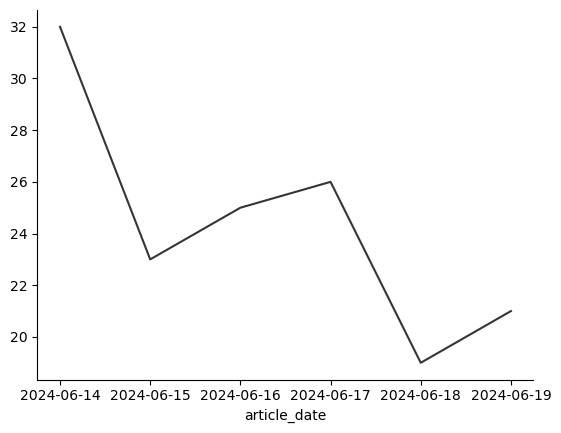

In [57]:
sns.lineplot(data=grouped_cal_day, color='#32363A') 
sns.despine() 
plt.show()

### Wie können wir die Daten noch analysieren?

In [58]:
all_results_df_f.head()

,id,section_name,pillar_name,article_title,article_url,article_author,text,Year,Month,Day
article_date,,,,,,,,,,
2024-06-14 04:00:40+00:00,world/article/2024/jun/14/young-germans-afd-eu...,World news,News,‘Crime is out of hand’: how young people turne...,https://www.theguardian.com/world/article/2024...,Deborah Cole in Brandenburg an der Havel,"Paul Friedrich, 16, could not wait to cast his...",2024,6,14
2024-06-14 05:20:41+00:00,tv-and-radio/article/2024/jun/14/tv-tonight-th...,Television & radio,Arts,TV tonight: the Welsh village that spotted a UFO,https://www.theguardian.com/tv-and-radio/artic...,,"Paranormal: The Village That Saw Aliens 9pm, B...",2024,6,14
2024-06-14 06:00:44+00:00,travel/article/2024/jun/14/readers-tips-favour...,Travel,Lifestyle,‘We drifted downriver and camped where we like...,https://www.theguardian.com/travel/article/202...,Guardian readers,A sublime dip in northern Italy\nIn the hills ...,2024,6,14
2024-06-14 07:00:44+00:00,football/article/2024/jun/14/germany-team-must...,Football,Sport,Germany team must turn nation from doubters in...,https://www.theguardian.com/football/article/2...,Jonathan Liew in Berlin,If only the Germans had a word for “zeitgeist”...,2024,6,14
2024-06-14 07:00:46+00:00,football/article/2024/jun/14/fear-of-missing-o...,Football,Sport,‘It was the fear of missing out’: Scotland fan...,https://www.theguardian.com/football/article/2...,Ewan Murray in Munich,The alarm was raised at about 9am on Thursday....,2024,6,14


In [60]:
# Wie viele Artikel je Sektion?
all_results_df_f.groupby('section_name').size().sort_values(ascending=False)

section_name
Football              85
World news            21
Business              10
Politics               4
Television & radio     3
Travel                 2
Sport                  2
Science                2
Opinion                2
Music                  2
News                   1
UK news                1
Society                1
Art and design         1
Books                  1
Law                    1
Global development     1
Global                 1
Film                   1
Fashion                1
Environment            1
Education              1
Life and style         1
dtype: int64

In [61]:
# Wie viele Artikel je Autor:innen?
all_results_df_f.groupby('article_author').size().sort_values(ascending=False)

article_author
Daniel Boffey in Gelsenkirchen        5
Phillip Inman                         3
Ewan Murray in Munich                 3
Kate Connolly in Berlin               3
Daniel Harris                         3
                                     ..
Hayden Vernon                         1
Harry Davies                          1
Guardian readers and Alfie Packham    1
Guardian readers                      1
Yohannes Lowe                         1
Length: 111, dtype: int64

In [62]:
# pillarNames
pillar_df = all_results_df_f.groupby('pillar_name').size().sort_values(ascending=False)
pillar_df

pillar_name
Sport        87
News         44
Arts          8
Lifestyle     4
Opinion       2
dtype: int64

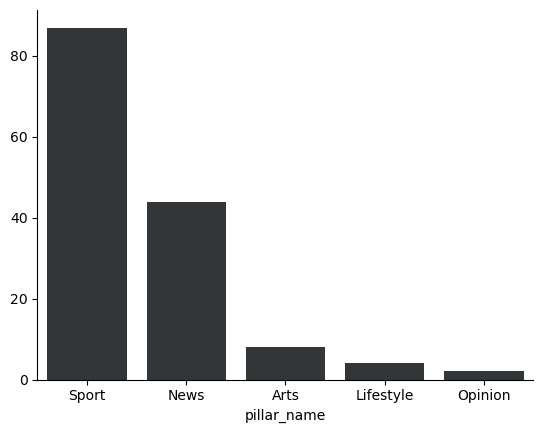

In [63]:
sns.barplot(data=pillar_df, color='#32363A') 
sns.despine() 
plt.show()

In [64]:
pillar_date = all_results_df_f.groupby([pd.Grouper(freq='D', level=0), 'pillar_name']).size().reset_index(name='article_count')
pillar_date

,article_date,pillar_name,article_count
0,2024-06-14 00:00:00+00:00,Arts,2
1,2024-06-14 00:00:00+00:00,Lifestyle,1
2,2024-06-14 00:00:00+00:00,News,10
3,2024-06-14 00:00:00+00:00,Sport,19
4,2024-06-15 00:00:00+00:00,Arts,1
5,2024-06-15 00:00:00+00:00,Lifestyle,2
6,2024-06-15 00:00:00+00:00,News,3
7,2024-06-15 00:00:00+00:00,Sport,17
8,2024-06-16 00:00:00+00:00,Arts,1
9,2024-06-16 00:00:00+00:00,Lifestyle,1


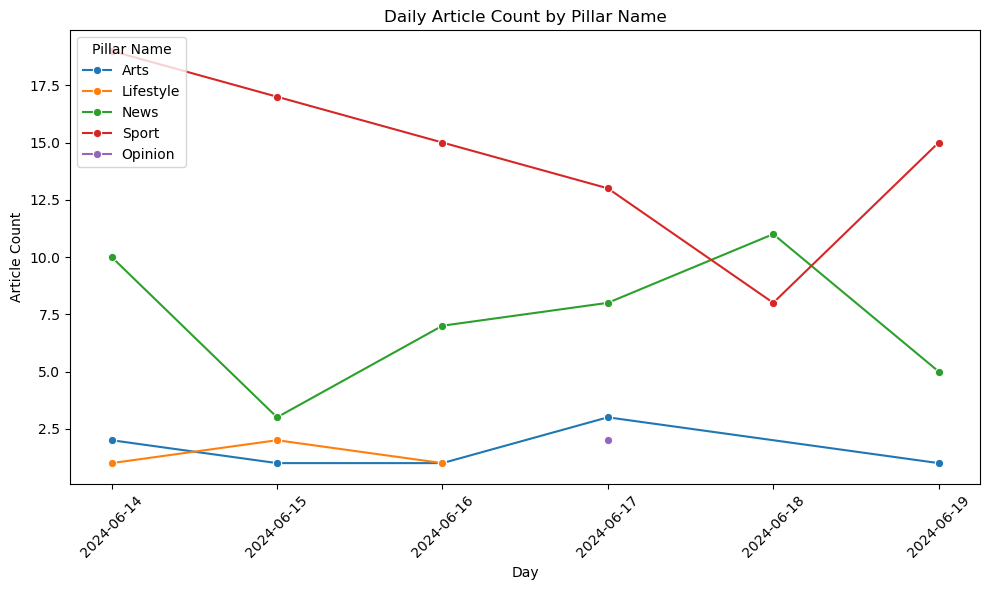

In [65]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=pillar_date, x='article_date', y='article_count', hue='pillar_name', marker='o')
plt.title('Daily Article Count by Pillar Name')
plt.xlabel('Day')
plt.ylabel('Article Count')
plt.xticks(rotation=45)
plt.legend(title='Pillar Name', loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()

### Zum Schluss: Daten exportieren

In [66]:
all_results_df_f.to_csv('../data/guardian_articles.csv', index=False)